Start with autoreload magic; this reloads modules automatically before entering the execution of code and thus enabled development in modules like util.py

In [133]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [134]:
import os
from glob import glob

import numpy as np
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt

import config

import util

In [135]:
obspack_dir = "/glade/work/mclong/sno-analysis/obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18/data/nc"
surface_files = [
    f"{obspack_dir}/co2_alt_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_brw_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_cba_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_cgo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_kum_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_ljo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_mlo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_psa_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_smo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_spo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_gould_shipboard-insitu_1_allvalid.nc",
]

obspack_files = {}
for f in surface_files:
    stn = os.path.basename(f).split('_')[1]
    obspack_files[stn] = os.path.basename(f)

### Contribution details
- 521 Obspack netcdf files (e.g. mlo_surface-flask_1_representative.nc)
- (ObsPack 7.0 has 524 records)
- 32 gridded mole fraction files (annual 1989-2020)

In [156]:
droot = "/glade/p/eol/stephens/longcoll/apo-forward-data/TM5-NOAA"

path = f"{droot}/{obspack_files['cba']}"
print(path)
ds = xr.open_dataset(path)
droplist = ['time_components','solartime_components']
ds = ds.drop(droplist)
df = ds.to_dataframe()

# Andy's time_components are all zeros, have to get from ObsPack
path = f"{obspack_dir}/{obspack_files['cba']}"
print(path)
tc = xr.open_dataset(path)['time_components']
tc = tc.to_dataframe(dim_order=['calendar_components','obs']).unstack(level=0)
#tc.drop('obs',axis=1)
tc.columns = ['year', 'month', 'day', 'hour', 'minute', 'second'] 
df['time'] = pd.to_datetime(tc)
df = df.set_index('time')
#df = df.dropna()
df

/glade/p/eol/stephens/longcoll/apo-forward-data/TM5-NOAA/co2_cba_surface-flask_4_representative.nc
/glade/work/mclong/sno-analysis/obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18/data/nc/co2_cba_surface-flask_4_representative.nc


,time_decimal,value,latitude,longitude,altitude,obs_flag,obspack_id,sampling_strategy,apo_jena,o2_cesm,...,co2_oco2mip,co2_gridfed,o2_gridfed,co2bg,u,v,blh,q,temperature,pressure
time,,,,,,,,,,,,,,,,,,,,,
1995-08-16 20:30:00,1999.861572,0.000352,55.209999,-162.720001,31.34,0.0,b'obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18...,2.0,400.000000,409.556519,...,400.000000,421.968964,369.582489,400.0,15.622723,6.849607,207.404358,0.007008,283.148468,100930.132812
1995-08-18 00:30:00,1999.861572,0.000350,55.209999,-162.720001,31.34,0.0,b'obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18...,2.0,400.000000,408.543610,...,400.000000,422.202118,369.241028,400.0,16.394356,-20.525475,258.381470,0.006952,284.378571,101629.617188
1995-08-24 19:00:00,1999.861572,0.000351,55.209999,-162.720001,31.34,0.0,b'obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18...,2.0,400.000000,409.615692,...,400.000000,422.046814,369.490692,400.0,-0.466627,8.550157,270.515472,0.006516,282.411774,100958.664062
1995-09-08 21:30:00,1999.861572,0.000353,55.209999,-162.720001,31.34,0.0,b'obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18...,2.0,400.000000,408.546417,...,400.000000,422.314423,369.089111,400.0,3.715158,27.774904,559.908386,0.006150,282.878815,99190.007812
1995-10-05 22:30:00,1999.861572,0.000359,55.209999,-162.720001,31.34,0.0,b'obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18...,2.0,400.000000,407.468781,...,400.000000,422.889954,368.347748,400.0,16.151701,46.459084,727.222351,0.006129,282.309174,98620.312500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-27 20:55:00,1999.861572,0.000387,55.209999,-162.720001,31.34,0.0,b'obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18...,2.0,413.520752,419.530884,...,442.724304,476.371246,294.564423,400.0,34.089485,-30.731457,394.512909,0.004947,278.717743,100753.765625
2020-10-01 21:45:00,1999.861572,0.000401,55.209999,-162.720001,31.34,0.0,b'obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18...,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,-24.459936,-22.977362,215.352676,0.004886,279.026733,99585.046875
2020-10-15 21:35:00,1999.861572,0.000386,55.209999,-162.720001,31.34,0.0,b'obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18...,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,27.981218,-35.117424,431.925293,0.007656,284.829376,99708.742188


In [157]:
# kluge - need to make station name dynamic and allow any number of stations
path = f"{droot}/{obspack_files['psa']}"
print(path)
ds2 = xr.open_dataset(path)
droplist = ['time_components','solartime_components']
ds2 = ds2.drop(droplist)
df2 = ds2.to_dataframe()
df2

# Andy's time_components are all zeros, have to get from ObsPack
path = f"{obspack_dir}/{obspack_files['psa']}"
print(path)
tc2 = xr.open_dataset(path)['time_components']
tc2 = tc2.to_dataframe(dim_order=['calendar_components','obs']).unstack(level=0)
#tc.drop('obs',axis=1)
tc2.columns = ['year', 'month', 'day', 'hour', 'minute', 'second'] 
df2['time'] = pd.to_datetime(tc2)
df2 = df2.set_index('time')
#df2 = df2.dropna()
df2

/glade/p/eol/stephens/longcoll/apo-forward-data/TM5-NOAA/co2_psa_surface-flask_4_representative.nc
/glade/work/mclong/sno-analysis/obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18/data/nc/co2_psa_surface-flask_4_representative.nc


,time_decimal,value,latitude,longitude,altitude,obs_flag,obspack_id,sampling_strategy,apo_jena,o2_cesm,...,co2_oco2mip,co2_gridfed,o2_gridfed,co2bg,u,v,blh,q,temperature,pressure
time,,,,,,,,,,,,,,,,,,,,,
1996-09-06 02:00:00,1999.861572,0.000361,-64.7742,-64.052696,20.0,0.0,b'obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18...,2.0,400.0,395.388214,...,400.0,421.904449,369.651367,400.0,-35.867054,-8.819005,298.480713,0.002474,269.240143,97962.203125
1996-09-09 09:38:00,1999.861572,0.000361,-64.7742,-64.052696,20.0,0.0,b'obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18...,2.0,400.0,394.909149,...,400.0,421.908386,369.645660,400.0,-31.517355,-18.941076,407.329773,0.002385,268.566925,97136.968750
1996-09-20 22:05:00,1999.861572,0.000361,-64.7742,-64.052696,20.0,0.0,b'obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18...,2.0,400.0,396.674713,...,400.0,422.114594,369.360291,400.0,-14.682441,-19.451160,175.344910,0.003262,271.253723,96109.945312
1996-09-29 20:53:00,1999.861572,0.000361,-64.7742,-64.052696,20.0,0.0,b'obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18...,2.0,400.0,398.221100,...,400.0,422.118835,369.354126,400.0,-14.343469,-37.103409,188.330109,0.003537,271.855835,94587.343750
1996-10-08 22:20:00,1999.861572,0.000361,-64.7742,-64.052696,20.0,0.0,b'obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18...,2.0,400.0,396.139648,...,400.0,422.148773,369.312317,400.0,-3.586975,-19.343405,334.989929,0.002339,267.835266,94780.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-17 15:00:00,1999.861572,0.000401,-64.7742,-64.052696,20.0,0.0,b'obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18...,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,-7.701219,-13.098254,137.736618,0.003544,273.178650,98617.187500
2020-09-30 13:20:00,1999.861572,0.000404,-64.7742,-64.052696,20.0,0.0,b'obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18...,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.474545,23.958244,208.895645,0.002536,272.248810,95307.492188
2020-10-14 13:40:00,1999.861572,0.000404,-64.7742,-64.052696,20.0,0.0,b'obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18...,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,-19.448586,-3.515644,225.519623,0.002702,272.082062,95083.148438


In [158]:
# add derived APO variables

df['apo_cesm'] = util.compute_apo (
    o2=df['o2_cesm'],
    co2=df['co2_cesm'],
    n2=df['n2_cesm']
)

df['apo_diss'] = util.compute_apo (
    o2=df['o2_gk01r16'],
    co2=df['co2_somffn'],
    n2=df['n2_era']
)

df['apo_gridfed'] = util.compute_apo (
    o2=df['o2_gridfed'],
    co2=df['co2_gridfed'],
    n2=0.0
)

df['apo_oco2mip'] = util.compute_apo (
    o2=df['co2_oco2mip'] * -1.4,
    co2=df['co2_oco2mip'],
    n2=0.0
)

# kluge - need to make station name dynamic and allow any number of stations
df2['apo_cesm'] = util.compute_apo (
    o2=df2['o2_cesm'],
    co2=df2['co2_cesm'],
    n2=df2['n2_cesm']
)

df2['apo_diss'] = util.compute_apo (
    o2=df2['o2_gk01r16'],
    co2=df2['co2_somffn'],
    n2=df2['n2_era']
)

df2['apo_gridfed'] = util.compute_apo (
    o2=df2['o2_gridfed'],
    co2=df2['co2_gridfed'],
    n2=0.0
)

df2['apo_oco2mip'] = util.compute_apo (
    o2=df2['co2_oco2mip'] * -1.4,
    co2=df2['co2_oco2mip'],
    n2=0.0
)

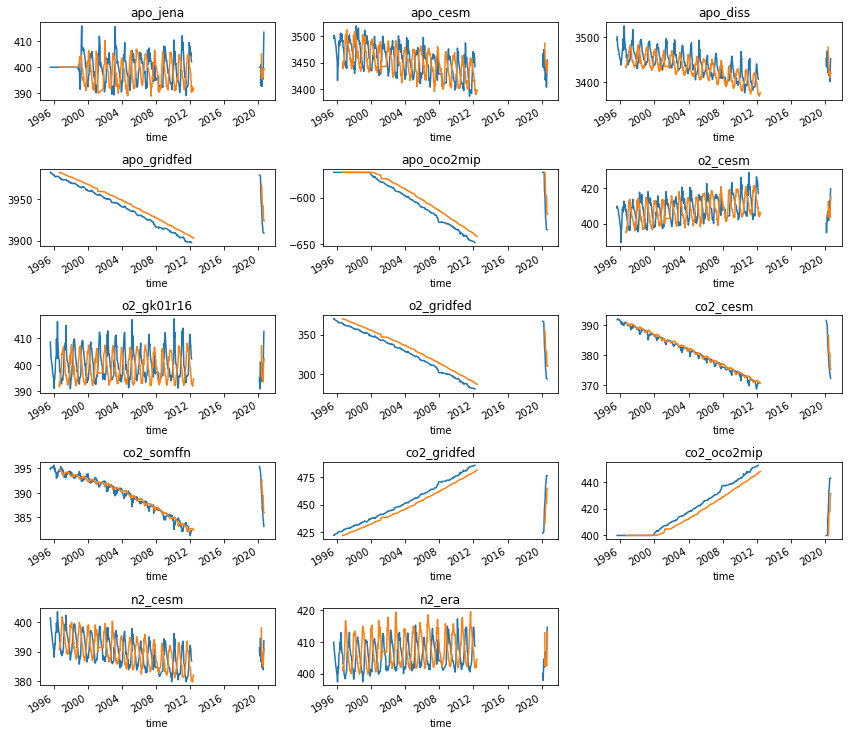

In [159]:
sno_vars = [
    'apo_jena',
    'apo_cesm',
    'apo_diss',
    'apo_gridfed',
    'apo_oco2mip',
    'o2_cesm', 
    'o2_gk01r16',  
    'o2_gridfed',   
    'co2_cesm', 
    'co2_somffn', 
    'co2_gridfed', 
    'co2_oco2mip', 
    'n2_cesm', 
    'n2_era', 
]

n_plots = len(sno_vars)
ncol = int(np.sqrt(n_plots))
nrow = int(((n_plots / ncol) + n_plots % ncol))
fig, axs = plt.subplots(nrow, ncol, figsize=(12, 12), squeeze=False)

for n, v in enumerate(sno_vars):
    ip, jp = np.unravel_index(n, axs.shape)
    
    ax = axs[ip, jp]
    df[v].plot(ax=ax)
    df2[v].plot(ax=ax)
    ax.set_title(v)

plt.tight_layout();    

for n in range(n+1, nrow*ncol):
    ip, jp = np.unravel_index(n, (nrow, ncol))
    axs[ip, jp].remove()
    

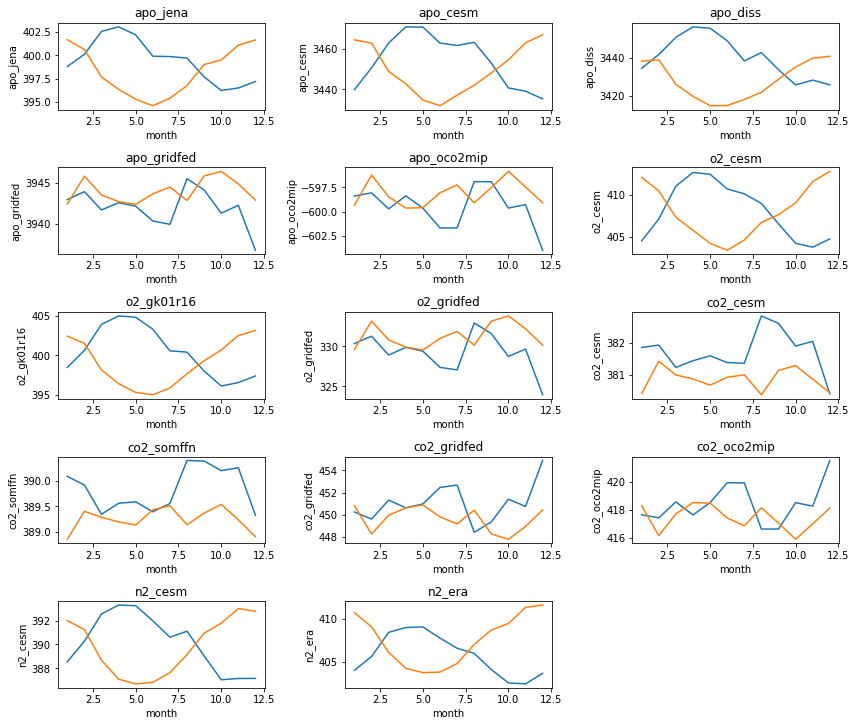

In [160]:
# seasonal climatology
ds = df.to_xarray()
ds_seas=ds.groupby('time.month').mean('time')
ds_seas['apo_cesm']

# kluge - need to make station name dynamic and allow any number of stations
ds2 = df2.to_xarray()
ds2_seas=ds2.groupby('time.month').mean('time')
ds2_seas['apo_cesm']


fig, axs = plt.subplots(nrow, ncol, figsize=(12, 12), squeeze=False)

for n, v in enumerate(sno_vars):
    ip, jp = np.unravel_index(n, axs.shape)
    
    ax = axs[ip, jp]
    ds_seas[v].plot(ax=ax)
    ds2_seas[v].plot(ax=ax)
    ax.set_title(v)

plt.tight_layout();    

for n in range(n+1, nrow*ncol):
    ip, jp = np.unravel_index(n, (nrow, ncol))
    axs[ip, jp].remove()
    

In [168]:
print(df2['apo_jena'].to_string())

time
1996-09-06 02:00:00    400.000000
1996-09-09 09:38:00    400.000000
1996-09-20 22:05:00    400.000000
1996-09-29 20:53:00    400.000000
1996-10-08 22:20:00    400.000000
1996-10-21 19:40:00    400.000000
1996-11-08 14:58:00    400.000000
1996-11-28 03:15:00    400.000000
1996-12-28 19:20:00    400.000000
1997-01-03 15:45:00    400.000000
1997-02-06 00:57:00    400.000000
1997-02-20 23:00:00    400.000000
1997-03-15 17:27:00    400.000000
1997-03-26 17:30:00    400.000000
1997-04-08 16:25:00    400.000000
1997-04-30 20:55:00    400.000000
1997-05-09 21:13:00    400.000000
1997-06-04 15:57:00    400.000000
1997-06-24 20:57:00    400.000000
1997-07-12 20:41:00    400.000000
1997-07-19 16:05:00    400.000000
1997-08-01 02:05:00    400.000000
1997-08-13 15:59:00    400.000000
1997-08-27 15:48:00    400.000000
1997-09-14 17:01:00    400.000000
1997-09-28 16:28:00    400.000000
1997-10-20 22:51:00    400.000000
1997-11-08 17:33:00    400.000000
1997-11-20 20:46:00    400.000000
1997-12-1